<a href="https://colab.research.google.com/github/Mubarok982/DM_ML/blob/main/Tugas_DM_PERT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder



# Load Dataset

In [ ]:
data = pd.read_csv("telco.csv", delimiter=";")
data.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.00,12,No
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13,No
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.8,No
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,No
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,Yes


In [ ]:
# Menampilkan ringkasan informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


# Menampilkan Distribusi fitur numerik

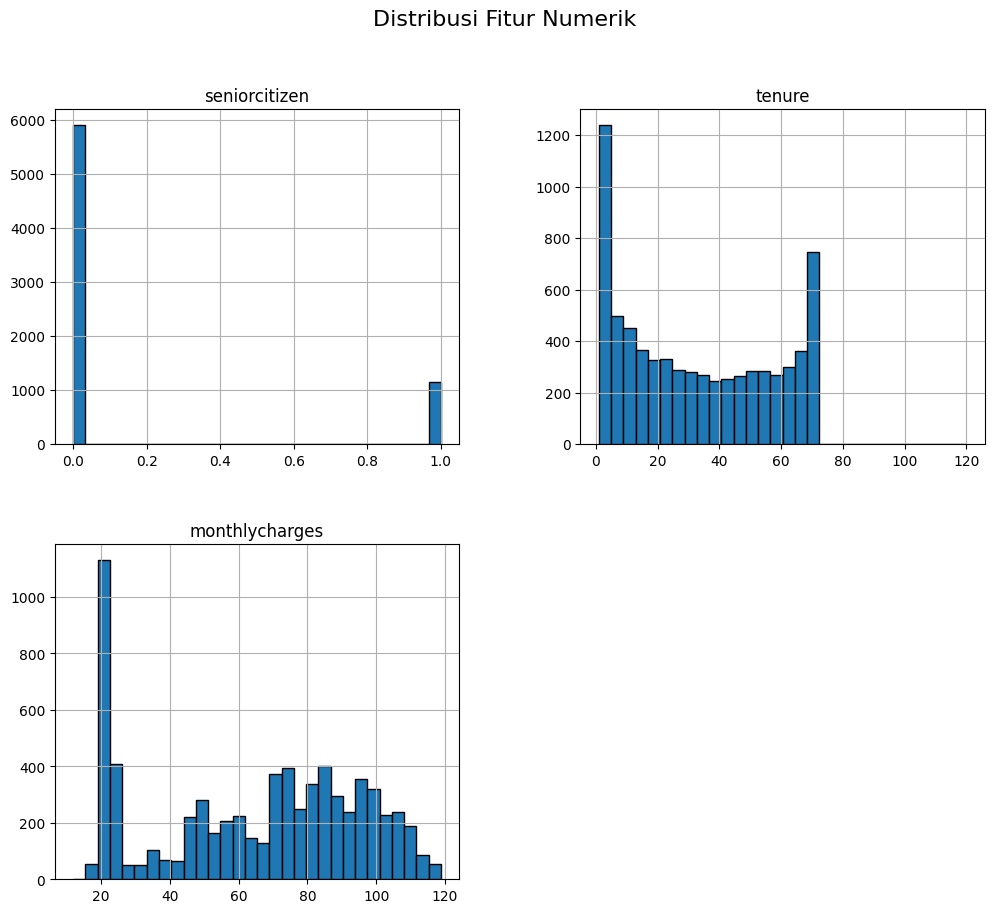

In [ ]:
# Menampilkan distribusi fitur numerik
data.select_dtypes(include=['number']).hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()


# # Menampilkan Distribusi fitur kategorikal

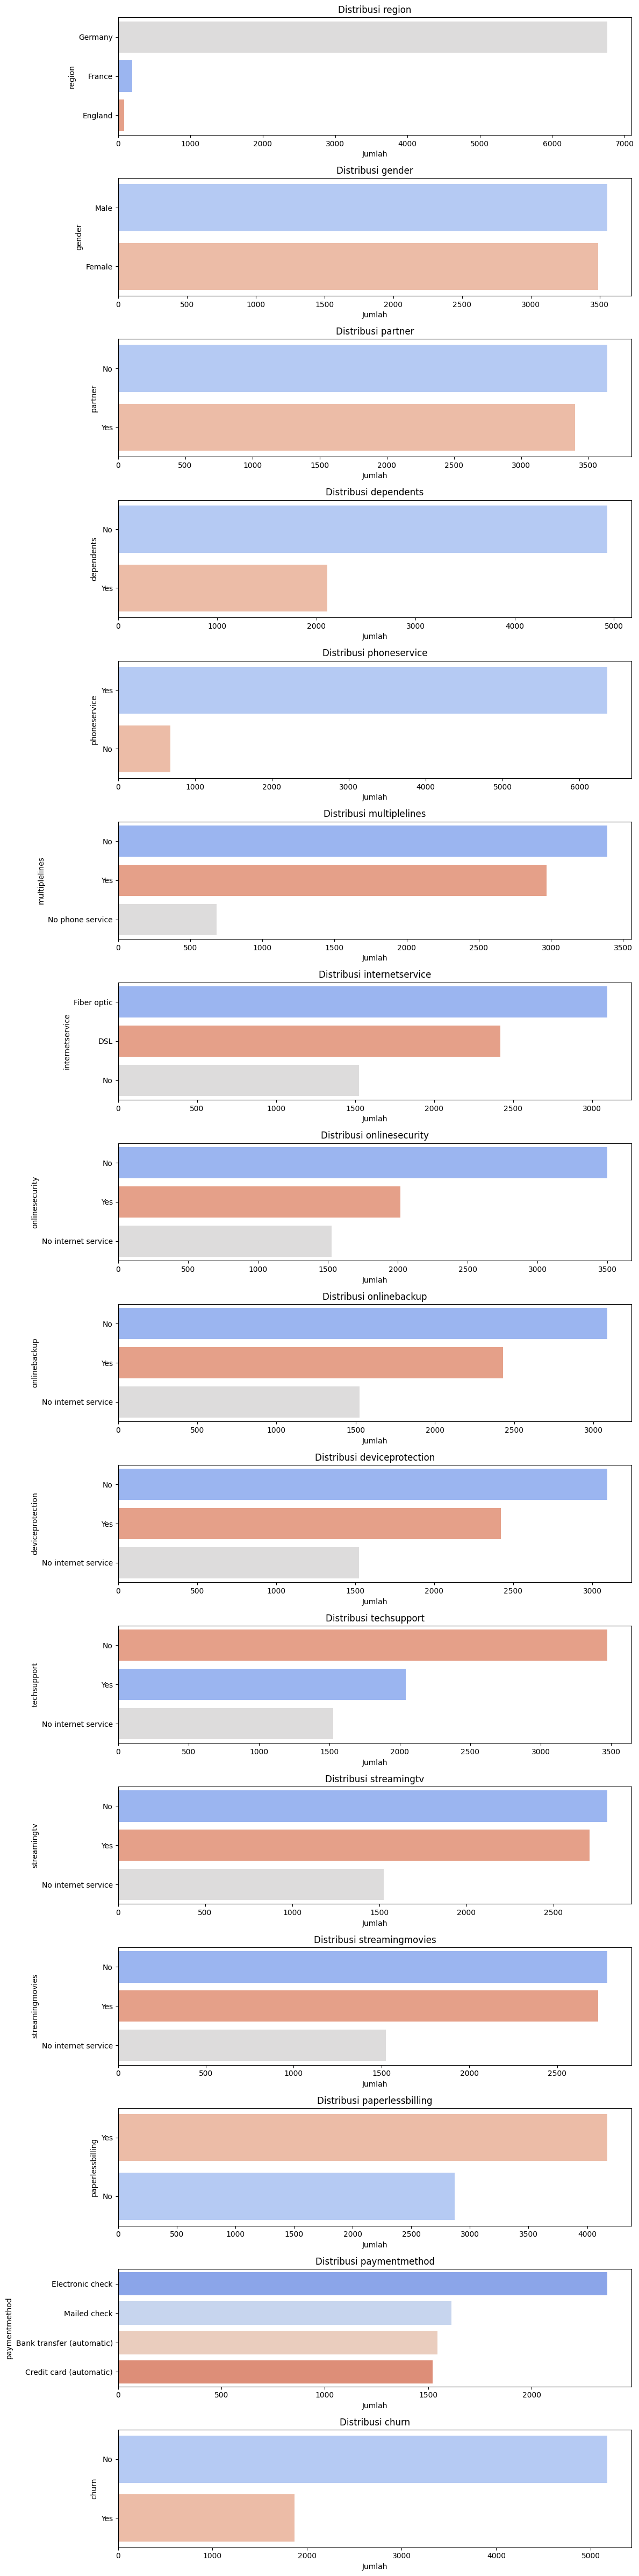

In [ ]:
# Menampilkan distribusi fitur kategorikal (kecuali customerid dan totalcharges)
categorical_features = data.select_dtypes(exclude=['number']).drop(columns=["customerid", "totalcharges"], errors='ignore')

plt.figure(figsize=(12, len(categorical_features.columns) * 3))
for i, col in enumerate(categorical_features.columns, 1):
    plt.subplot(len(categorical_features.columns), 1, i)
    sns.countplot(y=data[col], hue=data[col], legend=False, palette="coolwarm", order=data[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xlabel("Jumlah")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# jumlah pelanggan yang Churn dengan kriteria:
 - termasuk Senior Citizen
 - Monthly Charges > 75
 - Tenure > 20


In [ ]:
# Filter pelanggan yang memenuhi kriteria
filtered_data = data[(data['seniorcitizen'] == 1) &
                     (data['monthlycharges'] > 75) &
                     (data['tenure'] >20) ]


# Menampilkan jumlah pelanggan yang memenuhi kriteria
jumlah_churn = filtered_data.shape[0]
print(f"Jumlah pelanggan yang churn dengan kriteria di atas: {jumlah_churn}")
filtered_data.head(10)

Jumlah pelanggan yang churn dengan kriteria di atas: 514


,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3818,3956-CJUST,Germany,Female,1,No,No,23,Yes,No,Fiber optic,...,No,No,No,No,No,Yes,Bank transfer (automatic),75.40,1643.55,No
3886,7534-BFESC,Germany,Male,1,No,No,24,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Electronic check,76.10,1712.7,Yes
3957,2956-GGUCQ,Germany,Male,1,Yes,No,24,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Electronic check,78.85,1772.25,Yes
4018,4824-GUCBY,Germany,Female,1,No,No,22,Yes,No,Fiber optic,...,Yes,No,No,No,No,No,Electronic check,81.70,1820.9,No
4029,2070-XYMFH,Germany,Female,1,No,No,23,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Yes,Mailed check,79.35,1835.3,No
4051,7658-UYUQS,Germany,Male,1,Yes,No,21,Yes,No,Fiber optic,...,No,Yes,No,Yes,No,No,Bank transfer (automatic),86.55,1857.25,No
4053,0537-QYZZN,Germany,Male,1,Yes,Yes,24,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Electronic check,79.85,1857.75,No
4092,1989-PRJHP,Germany,Male,1,Yes,No,27,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Electronic check,75.50,1893.95,Yes
4105,6284-AHOOQ,Germany,Male,1,No,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,No,Yes,Bank transfer (automatic),90.50,1910.6,Yes
4121,0257-ZESQC,Germany,Female,1,Yes,No,27,Yes,No,Fiber optic,...,No,No,No,No,No,Yes,Bank transfer (automatic),75.20,1929.35,Yes


# Encoding Data Kategorikal

In [ ]:
# Pastikan kolom "churn" dikodekan dengan benar
encoder = LabelEncoder()
data["churn"] = encoder.fit_transform(data["churn"])

# Pastikan filtered_data["churn"] juga numerik
filtered_data["churn"] = filtered_data["churn"].astype(int)

# Cek ulang tipe data setelah konversi
print(filtered_data.dtypes)

# Hitung persentase churn
churn_rate_filtered = filtered_data["churn"].mean() * 100
churn_rate_total = data["churn"].mean() * 100

print(f"Persentase Churn (Filtered Data): {churn_rate_filtered:.2f}%")
print(f"Persentase Churn (Total Data): {churn_rate_total:.2f}%")


ValueError: invalid literal for int() with base 10: 'No'

In [ ]:
# Persentase churn pada subset data
churn_rate_filtered = filtered_data["churn"].mean() * 100

# Persentase churn pada seluruh dataset
churn_rate_total = data["churn"].mean() * 100

print(f"Persentase Churn (Filtered Data): {churn_rate_filtered:.2f}%")
print(f"Persentase Churn (Total Data): {churn_rate_total:.2f}%")


TypeError: Could not convert string 'NoYesYesNoNoNoNoYesYesYesNoNoYesNoNoNoNoYesNoYesNoNoYesNoYesYesYesNoYesNoNoYesNoYesNoYesNoYesYesYesYesNoNoNoNoYesNoYesYesNoNoNoNoYesYesYesYesYesYesYesYesNoYesNoNoNoNoYesNoYesYesYesYesNoYesYesNoYesYesYesYesNoYesYesNoYesNoNoYesNoNoNoYesYesYesNoNoYesNoNoYesNoYesNoYesNoNoYesNoNoNoYesYesYesNoYesNoNoYesNoYesNoYesNoNoYesYesNoNoYesNoYesNoYesNoNoNoYesNoNoYesNoYesNoNoNoYesYesNoYesYesYesNoYesNoYesNoYesNoNoYesYesNoNoNoNoYesNoYesYesNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoNoYesYesYesYesNoNoYesYesYesNoNoNoYesYesNoYesYesYesYesNoNoNoYesYesYesYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo' to numeric

In [ ]:
# Filter pelanggan Senior Citizen dengan kriteria tertentu
filtered_data = data[
    (data["seniorcitizen"] == 1) &
    (data["monthlycharges"] > 45) &
    (data["tenure"] > 10)
]

# Filter pelanggan Non-Senior Citizen dengan kriteria tertentu
non_senior_filtered = data[
    (data["seniorcitizen"] == 0) &
    (data["monthlycharges"] > 75) &
    (data["tenure"] > 20)
]

# Hitung jumlah pelanggan yang memenuhi kriteria
jumlah_senior = filtered_data.shape[0]
jumlah_non_senior = non_senior_filtered.shape[0]

# Hitung persentase churn untuk masing-masing kelompok
churn_senior = filtered_data["churn"].mean() * 100
churn_non_senior = non_senior_filtered["churn"].mean() * 100

# Tampilkan hasil
print(f"Jumlah pelanggan Senior Citizen yang memenuhi kriteria: {jumlah_senior}")
print(f"Jumlah pelanggan Non-Senior Citizen yang memenuhi kriteria: {jumlah_non_senior}\n")

print(f"Persentase Churn Senior Citizen: {churn_senior:.2f}%")
print(f"Persentase Churn Non-Senior Citizen: {churn_non_senior:.2f}%")
